Link PDF A3:
https://mediacdns3.ulife.com.br/PAT/Upload/5408418/ProjetoFinalA3DesenvolvimentodeumAgenteInteligente_20241030193928.pdf

In [9]:
# Importação das bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Carregamento e preparação dos dados
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

X = data['message']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# 2. Treinamento e avaliação com diferentes algoritmos
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}
for model_name, model in models.items():
    results[model_name] = train_and_evaluate_model(model, X_train_tfidf, y_train, X_test_tfidf, y_test)

                     Accuracy  Precision    Recall  F1 Score
K-Nearest Neighbors  0.913004   1.000000  0.348993  0.517413
Decision Tree        0.968610   0.907143  0.852349  0.878893
Random Forest        0.981166   1.000000  0.859060  0.924188


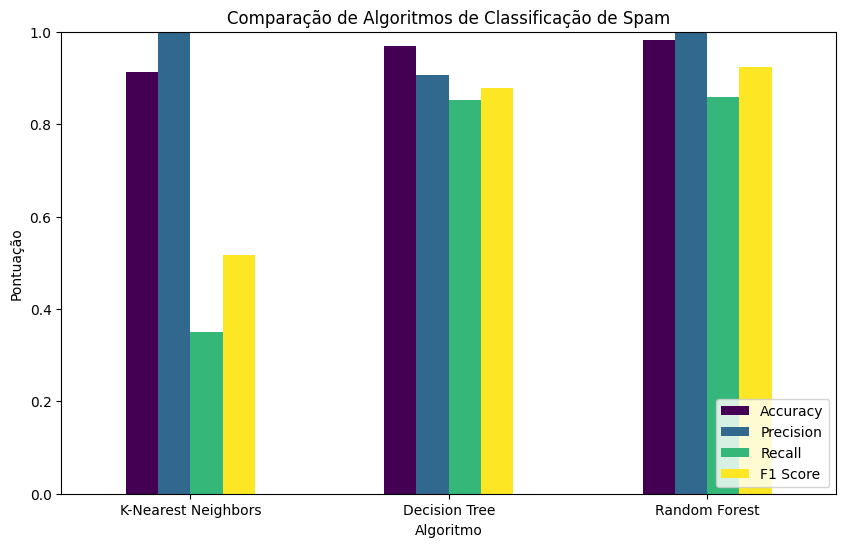

In [11]:
# 3. Visualização dos resultados
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T

print(results_df)

results_df.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='viridis')
plt.title("Comparação de Algoritmos de Classificação de Spam")
plt.xlabel("Algoritmo")
plt.ylabel("Pontuação")
plt.legend(loc="lower right")
plt.xticks(rotation=0)
plt.show()